In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%run finance.ipynb

names = ['S&P 500', 'Dividenden Aristocrats', 'Commodity ETF', 'Eurostoxx 50', 'Eurostoxx 50', 'Small Caps USA', \
        'Small Caps USA', 'Dividenden Aristocrats', 'Growth', 'Growth', 'China', 'India', \
        'REIT', 'MSCI World', 'Euro Stoxx 50', 'Emerging Asia', 'TIPS', 'Money Market', 'GER Bonds 10y', 'US Bonds 20y',\
        'US Bonds 1-3y']

etf_rene = ['SPY', 'UDVD.L', 'C099.DE', 'EUNL.DE', 'DXET.DE', 'SXRG.F', 'ISP6.L', 'XDND.F', 'IDJG.AS', 'LGWT.DE', \
           'LG9.SI', 'LG8.SI', 'XREA.F', 'WLD.PA', 'EXFN.L', 'AASI.PA', 'EMI.MI', 'C101.F', '8523.F', 'IDTL.L', \
           'XUT3.L']

In [57]:
## Number of chosen ETF in above list
choice = -1

print(names[choice])

df = pd.read_csv("data/{0}.csv".format(etf_rene[choice]))
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

US Bonds 1-3y


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-09-08,158.020004,160.020004,158.020004,158.020004,156.156281,0.0
1,2009-09-09,158.009995,160.009995,158.009995,158.009995,156.146378,0.0
2,2009-09-10,158.210007,160.210007,158.210007,158.210007,156.344040,0.0
3,2009-09-11,158.300003,160.300003,158.300003,158.300003,156.432968,0.0
4,2009-09-14,158.070007,160.070007,158.070007,158.070007,156.205688,0.0


In [58]:
df.isna().sum()

Date          0
Open         12
High         12
Low          12
Close        12
Adj Close    12
Volume       12
dtype: int64

In [59]:
#df = clean_data(df)
#df.isna().sum()

Text(0,0.5,'Adjusted Close Price in $')

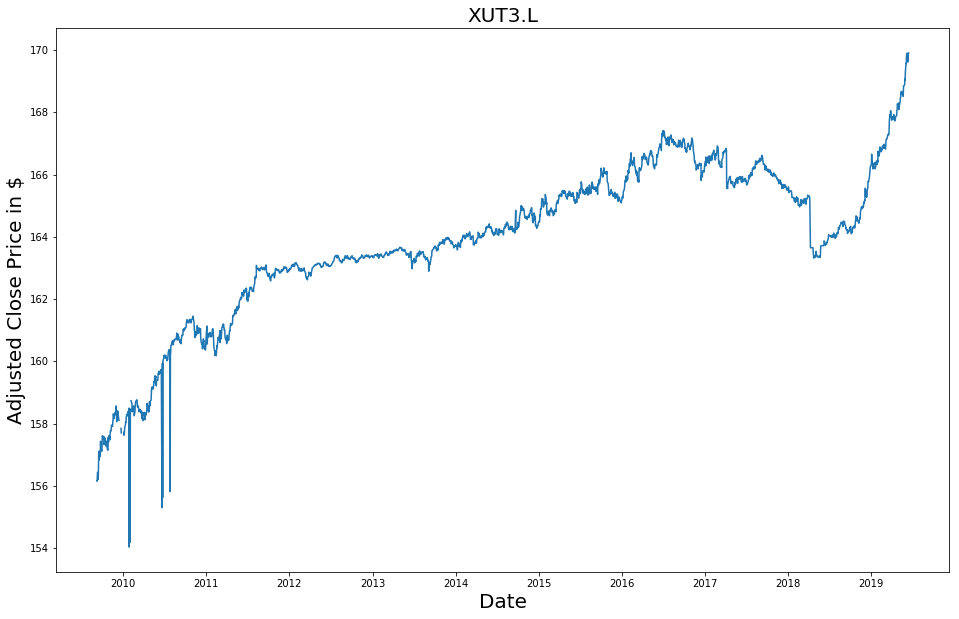

In [60]:
#df = clean_data(df)

plt.figure(figsize=(16,10));
#plt.title("SPDR S&P 500 ETF (SPY)", fontsize=20)
plt.title(etf_rene[choice], fontsize=20)
plt.plot(df['Date'], df['Adj Close']);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adjusted Close Price in $", fontsize=20)

Text(0,0.5,'Adjusted Close Price in $')

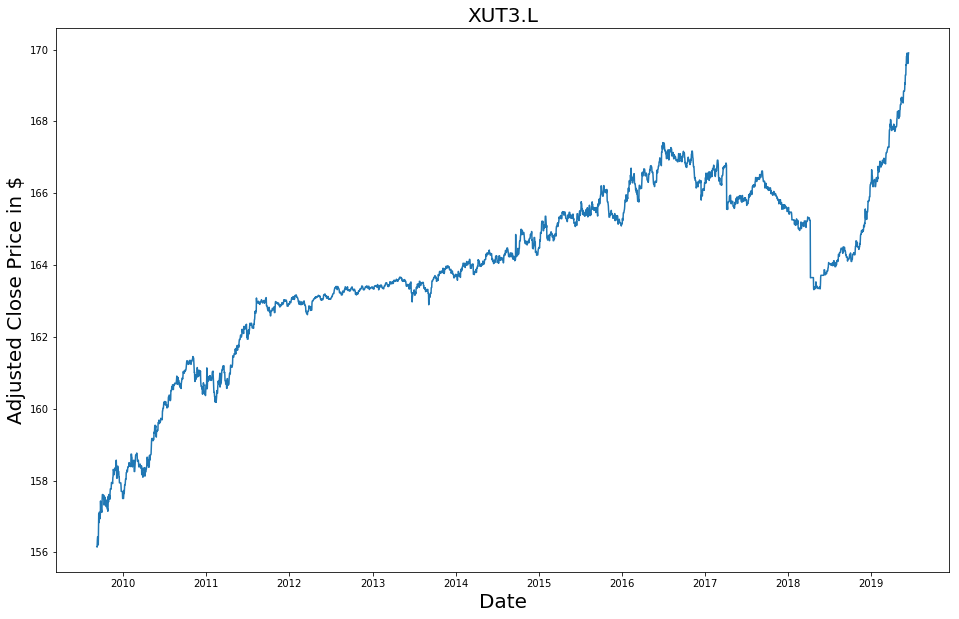

In [61]:
df = clean_data_with_outliers(df)

plt.figure(figsize=(16,10));
#plt.title("SPDR S&P 500 ETF (SPY)", fontsize=20)
plt.title(etf_rene[choice], fontsize=20)
plt.plot(df['Date'], df['Adj Close']);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adjusted Close Price in $", fontsize=20)

In [62]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,158.020004,160.020004,158.020004,158.020004,156.156281,0.0,2009-09-08
1,158.009995,160.009995,158.009995,158.009995,156.146378,0.0,2009-09-09
2,158.210007,160.210007,158.210007,158.210007,156.344040,0.0,2009-09-10
3,158.300003,160.300003,158.300003,158.300003,156.432968,0.0,2009-09-11
4,158.300003,160.300003,158.300003,158.300003,156.432968,0.0,2009-09-12


In [63]:
print("MIN =", df['Date'].min(), "MAX =", df['Date'].max())
min_date = str(df['Date'].min()).split(" ")[0]
max_date = str(df['Date'].max()).split(" ")[0]

mydf = df.copy()

MIN = 2009-09-08 00:00:00 MAX = 2019-06-14 00:00:00


In [64]:
mydf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000
mean,165.800808,165.838622,165.789614,165.794357,163.881294,524.130642
std,2.446329,2.398807,2.437928,2.437676,2.448537,2772.911467
min,155.869995,158.949997,155.869995,155.869995,156.146378,0.000000
25%,164.940002,164.944999,164.929993,164.940002,162.994659,0.000000
50%,166.009995,166.020004,166.000000,166.000000,164.042145,0.000000
75%,167.682496,167.690002,167.677498,167.684998,165.707275,65.000000
max,170.990005,170.990005,170.229996,170.059998,169.910004,104440.000000


In [65]:
#start = '1994-01-01'
#end = '2018-01-01'
start = min_date
end = max_date

In [66]:
#inv = stock_return(min_date, max_date, df)
#inv = stock_return('2011-05-01', '2019-05-31', df)
inv = simulate_investment(start, end, mydf, costs=0.0, TER=0.0012)

In [68]:
annual_return = invest_return_yearly(inv)

In [69]:
print("Annual return of portfolio = {0:.2f}%".format(annual_return))

Annual return of portfolio = 0.32%


In [70]:
mydf1 = mydf.copy()
years = int((mydf1['Date'].max()-mydf1['Date'].min()).days/365)
mydf1.set_index('Date', inplace=True)
p0 = mydf1["Adj Close"].loc[start]
p1 = mydf1["Adj Close"].loc[end]
print("Annual return of stock price alone = {0:.2f}%".format((p1/p0-1)/years*100))

Annual return of stock price alone = 0.98%


In [71]:
### timeframe of investing in years
timeframe = [1, 2, 5]#, 10, 15, 20]

#returns = np.zeros((len(timeframe), num_months - adjust_month + 1))
#dates = np.array((len(timeframe), num_months - adjust_month + 1))
returns = []
dates = []

year = int(start.split("-")[0])
for n, tf in enumerate(timeframe):
    print("Compute timeframe ", tf)
    #returns[n][0] = tf
    #dates[n][0] = str(tf)
    return_list = []
    date_list = []
    
    ### Compute iteration parameters
    start = min_date
    end = max_date

    if int(start.split("-")[2])>28:
        ## if day > 28 (no february data) start in the following month on the 1st day
        start_day = 1
        adjust_month = 1
    else:
        start_day = int(start.split("-")[2])
        adjust_month = 0
    day = start_day
    last_start = str(int(end.split("-")[0])-tf) + "-" + end.split("-")[1] + "-" + end.split("-")[2]
    print(start, end, last_start)
    num_months = (int(last_start.split("-")[0]) - int(start.split("-")[0]) - 1)*12
    num_months += 12 - int(start.split("-")[1])
     ### one month less to make sure enddate of last_start is not later than end
    num_months += 11 - int(last_start.split("-")[1])
    year = int(start.split("-")[0])
    
    for m in range(adjust_month, num_months):
        ## if day > 28 (no february data) start in the following month on the 1st day
        month = (int(start.split("-")[1]) + m) % 12 
        if month == 0:
            month = 12
        if month == 1 and m != 0:
            year += 1
        #print(month)
        str_day = "0" + str(day) if len(str(day)) == 1 else str(day)
        str_month = "0" + str(month) if len(str(month)) == 1 else str(month)
        start_date = str(year) + "-" + str_month + "-" + str_day
        end_date = str(int(start_date.split("-")[0]) + tf) + "-" + start_date.split("-")[1] + "-" + start_date.split("-")[2]
        #print(start_date, end_date)
        inv = simulate_investment(start_date, end_date, mydf, costs=0.0, TER=0.009)
        #returns[n][m + 1] = invest_return_yearly(inv)
        #dates[n][m + 1] = start_date + "_" + end_date
        return_list.append(invest_return_yearly(inv))
        date_list.append(start_date+"_"+end_date)
        #print(return_list)
    returns.append(return_list)
    dates.append(date_list)
        
#np.save("year_return_timeframe.npy", returns)
#np.save("dates_timeframe.npy", dates)

Compute timeframe  1
2009-09-08 2019-06-14 2018-06-14
Compute timeframe  2
2009-09-08 2019-06-14 2017-06-14
Compute timeframe  5
2009-09-08 2019-06-14 2014-06-14


In [72]:
returns

[[0.7844051976723332,
  0.9272191679100539,
  0.7166574313913543,
  0.2557615149585635,
  0.13502295219447458,
  -0.24909203302536653,
  -0.11496320357393675,
  -0.24894975981103462,
  0.13022138353315782,
  0.4064625416009049,
  0.26540157961989497,
  0.48004345834451456,
  0.5277655874185605,
  0.2501689699960785,
  0.32617917765909166,
  0.30378518163922674,
  0.15161487447843403,
  0.10929420853014182,
  -0.09826185521006993,
  -0.30296478058867277,
  -0.1702406594812319,
  -0.2524549349738298,
  -0.30745835201000515,
  -0.2742262501424836,
  -0.24395598808790397,
  -0.29516041010710636,
  -0.31578451511431505,
  -0.2839104742282497,
  -0.31262620882218106,
  -0.31080366512350943,
  -0.334412884236146,
  -0.28530991578998854,
  -0.2839877845250083,
  -0.4055924609089989,
  -0.5359155895720225,
  -0.3795780282500494,
  -0.5969146497870947,
  -0.29801883452603706,
  -0.24829976282216837,
  -0.22567974053124829,
  -0.38028990854008793,
  -0.16379967815345342,
  -0.2587076740283911,
  

In [73]:
frames = []
means, std = [], []
for m, tf in enumerate(timeframe):
    data = returns[m][1:]
    ind = dates[m][1:]
    frame = pd.DataFrame(data, index=ind, columns=["returns"])
    frames.append(frame)
    print("Statistics for timeframe ", tf, " years")
    print(frame.describe())
    means.append(float(frame.describe().iloc[1]))
    std.append(float(frame.describe().iloc[2]))
means = np.array(means)
std = np.array(std)

Statistics for timeframe  1  years
          returns
count  103.000000
mean    -0.220104
std      0.472252
min     -1.729544
25%     -0.404257
50%     -0.248950
75%      0.054591
max      1.148708
Statistics for timeframe  2  years
         returns
count  91.000000
mean   -0.269434
std     0.304779
min    -1.240924
25%    -0.381564
50%    -0.238869
75%    -0.077263
max     0.299617
Statistics for timeframe  5  years
         returns
count  55.000000
mean   -0.279695
std     0.151598
min    -0.657746
25%    -0.345890
50%    -0.226672
75%    -0.166870
max    -0.087136


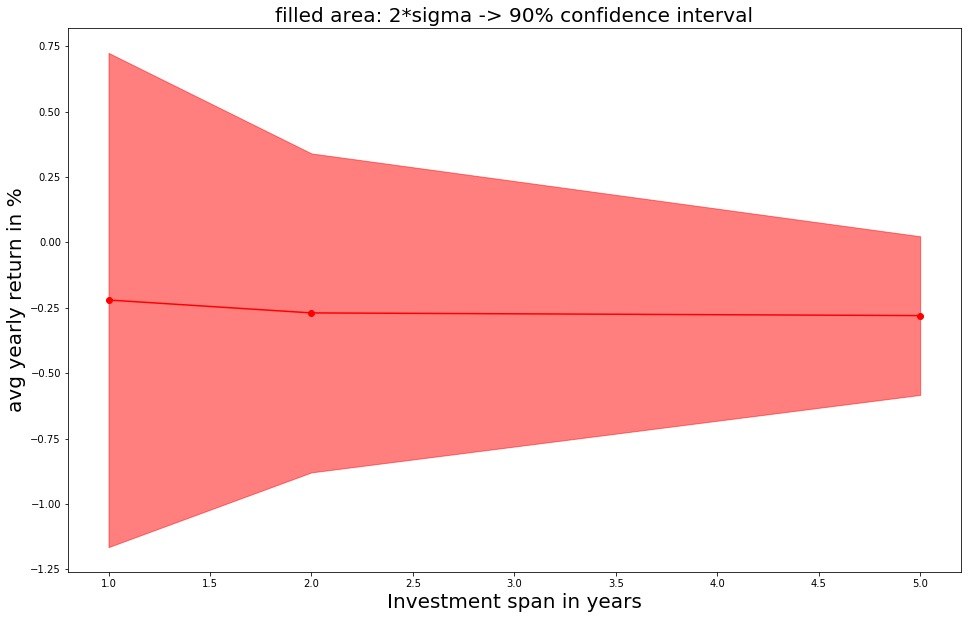

In [74]:
fig = plt.figure(figsize=(16,10));

plt.plot(np.array(timeframe), means, 'ro-');
plt.fill_between(np.array(timeframe), means - 2*std, means + 2*std, color='r', alpha=0.5);

#plt.ylim(-15,25);

plt.xlabel("Investment span in years", fontsize=20);
plt.ylabel("avg yearly return in %", fontsize=20);

plt.title("filled area: 2*sigma -> 90% confidence interval", fontsize=20);

plt.show()

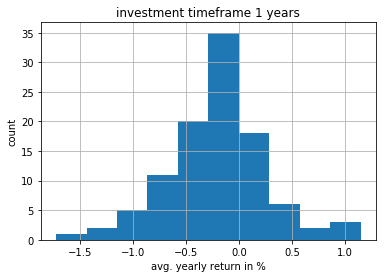

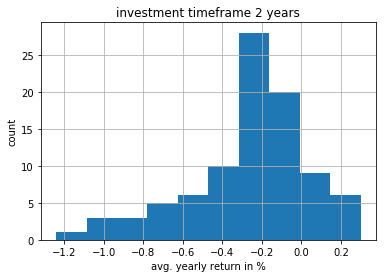

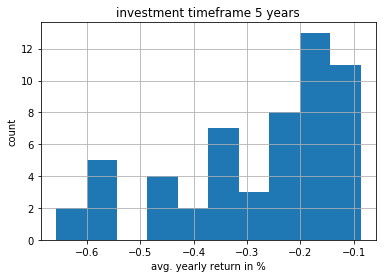

In [75]:
for m, tf in enumerate(timeframe):
    data = frames[m]
    data.hist()
    plt.title("investment timeframe "+ str(tf)+ " years");
    plt.xlabel("avg. yearly return in %");
    plt.ylabel("count");

In [76]:

# Leveraged from the helpful Datacamp Python Finance trading blog post.

#from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
#yf.pdr_override() # <== that's all it takes :-)

#sp500 = pdr.get_data_yahoo('^GSPC', 
#                           start_sp,
#                             end_sp)
                          
#sp500.head()



In [77]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
0,158.020004,160.020004,158.020004,158.020004,156.156281,0.0,2009-09-08
1,158.009995,160.009995,158.009995,158.009995,156.146378,0.0,2009-09-09
2,158.210007,160.210007,158.210007,158.210007,156.344040,0.0,2009-09-10
3,158.300003,160.300003,158.300003,158.300003,156.432968,0.0,2009-09-11
4,158.300003,160.300003,158.300003,158.300003,156.432968,0.0,2009-09-12
5,158.300003,160.300003,158.300003,158.300003,156.432968,0.0,2009-09-13
6,158.070007,160.070007,158.070007,158.070007,156.205688,0.0,2009-09-14
7,158.600006,159.600006,158.600006,158.600006,156.729431,0.0,2009-09-15
8,158.940002,159.190002,158.940002,158.940002,157.065414,0.0,2009-09-16
9,158.699997,158.949997,158.699997,158.699997,156.828247,0.0,2009-09-17


In [78]:
df.sort_values('Close', ascending=False)['Close'].iloc[-10:]

5      158.300003
2      158.210007
6      158.070007
0      158.020004
1      158.009995
322    157.669998
289    157.479996
286    157.149994
146    156.029999
142    155.869995
Name: Close, dtype: float64

In [79]:
get_lows_highs(mydf, 10)

(1     156.146378
 0     156.156281
 6     156.205688
 2     156.344040
 3     156.432968
 4     156.432968
 5     156.432968
 7     156.729431
 9     156.828247
 14    156.936951
 Name: Adj Close, dtype: float64, 3563    169.615005
 3562    169.755005
 3564    169.785004
 3558    169.809998
 3557    169.815002
 3565    169.860001
 3559    169.899994
 3560    169.899994
 3561    169.899994
 3566    169.910004
 Name: Adj Close, dtype: float64)